# Tabu Search for SAT

In [1]:
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

from api import frame, index_20, index_50

In [46]:
def boxplots(frame, index=None, **kwargs):
    if index is None:
        index = frame.index
    fig, axes = plt.subplots(2, 1, figsize=(10,6))
    sns.boxplot(**kwargs, data=frame.iloc[index.intersection(index_20)],
                ax=axes[0])
    sns.boxplot(**kwargs, data=frame.iloc[index.intersection(index_50)],
                ax=axes[1])
    
def pairplot(frame):
    g = sns.PairGrid(frame,
                     x_vars=['time', 'relative_error'],
                     y_vars=['max_iteration', 'neighbors', 'tabu_tenure', 'reinits'],
                     hue='group', height=3.5)
    g.map(sns.stripplot, jitter=1.5, size=3, dodge=True)
    g.add_legend()

## Abstract

SAT (Boolean satisfiability problem) is an NP-hard problem without a one superior solution.
In this project I experimented with solving SAT instances using Tabu Search.
Results were measured on X different sets with over Y instances.
Based on the results of the measurements I consider Tabu Search an viable
approach for NP-hard problems.

## SAT

[Boolean satisfiability problem](https://en.wikipedia.org/wiki/Boolean_satisfiability_problem)

## Tabu Search

[Tabu search](https://en.wikipedia.org/wiki/Tabu_search)

## Configuration Analysis

### Maximum Iteration

Before any max iteration guesses I had first searched for it on the internet.
I found there is a [numerical upper bound of $O^∗(1.30331n)$](https://cstheory.stackexchange.com/questions/1060/best-upper-bounds-on-sat).

In [3]:
print(f'Time total: {timedelta(seconds=frame["time"].sum())}',
      f'Time 20 vars: {timedelta(seconds=frame.iloc[index_20]["time"].sum())}',
      f'Time 50 vars: {timedelta(seconds=frame.iloc[index_50]["time"].sum())}', sep='\n')

Time total: 0:48:35.973269
Time 20 vars: 0:03:56.692390
Time 50 vars: 0:44:39.280879


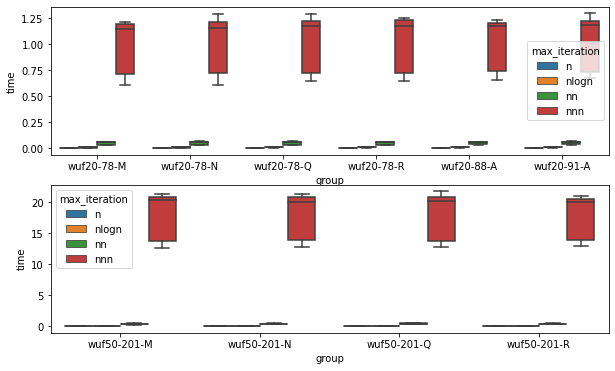

In [4]:
boxplots(frame, x='group', y='time', hue='max_iteration')

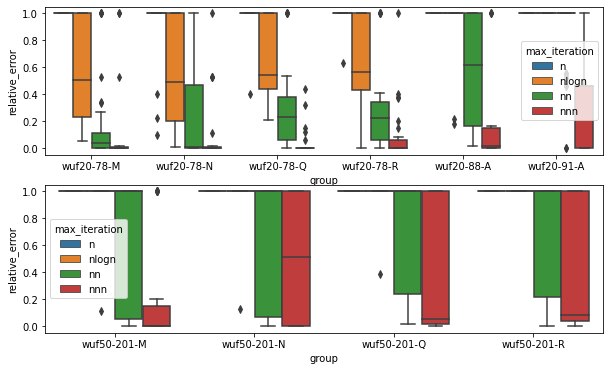

In [5]:
boxplots(frame, x='group', y='relative_error', hue='max_iteration')

In [13]:
ratio = (frame.relative_error != 1).sum() / frame.shape[0]
print(f'Ration of satisfied formula: {ratio:%}')

Ration of satisfied formula: 40.763889%


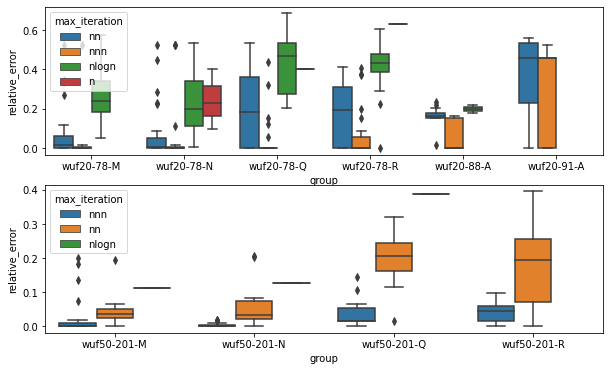

In [15]:
boxplots(frame, frame[frame.relative_error != 1].index,
         x='group', y='relative_error', hue='max_iteration')

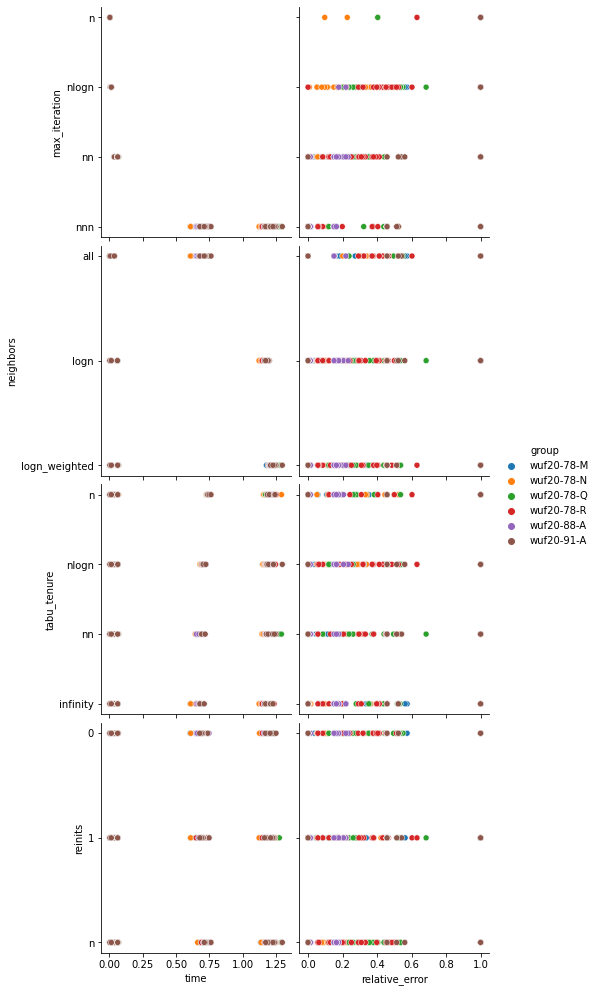

In [16]:
sns.pairplot(x_vars=['time', 'relative_error'],
         y_vars=['max_iteration', 'neighbors', 'tabu_tenure', 'reinits'],
         hue='group', height=3.5,
         data=frame.iloc[frame.index.intersection(index_20)])

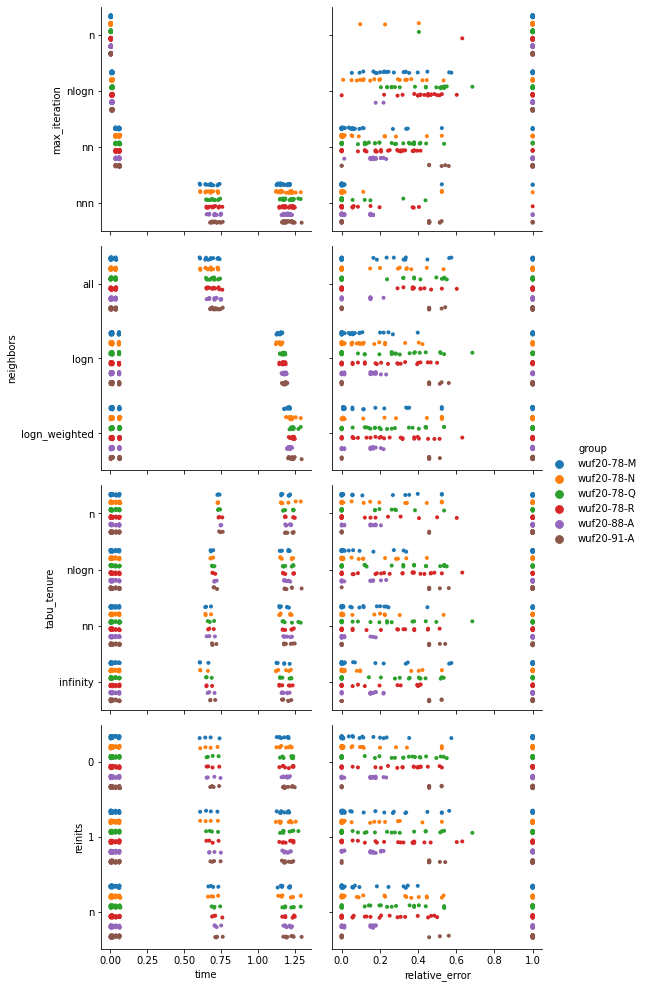

In [33]:
pairplot(frame.iloc[index_20])

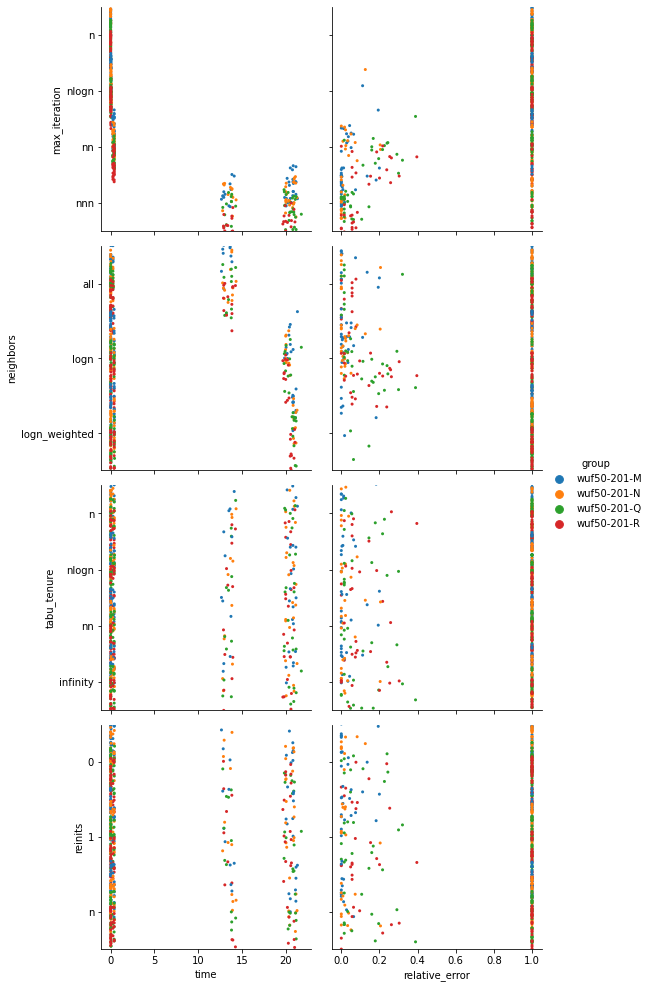

In [47]:
pairplot(frame.iloc[index_50])

In [52]:
frame.groupby(['max_iteration']).mean()

,optimum,time,value,relative_error
max_iteration,,,,
n,38866.4,0.004671,359.486111,0.991009
nlogn,38866.4,0.023702,4981.961111,0.845320
nn,38866.4,0.177216,18352.286111,0.514829
nnn,38866.4,7.894337,25669.655556,0.228906


In [53]:
frame.groupby(['neighbors']).mean()

,optimum,time,value,relative_error
neighbors,,,,
all,38866.4,1.488299,12245.360417,0.641275
logn,38866.4,2.253164,19514.206250,0.518591
logn_weighted,38866.4,2.333482,5262.975000,0.775182


In [54]:
frame.groupby(['tabu_tenure']).mean()

,optimum,time,value,relative_error
tabu_tenure,,,,
infinity,38866.4,2.015297,13274.311111,0.619588
n,38866.4,2.043097,10524.825000,0.678422
nlogn,38866.4,2.027578,12519.166667,0.658674
nn,38866.4,2.013954,13045.086111,0.623379


In [55]:
frame.groupby(['reinits']).mean()

,optimum,time,value,relative_error
reinits,,,,
0,38866.4,2.005990,11264.587500,0.658314
1,38866.4,2.011038,12094.800000,0.640580
n,38866.4,2.057917,13663.154167,0.636154



## Results

## Discussion

## Conclusion

## References

* [Tabu Search for SAT, Bertrand Mazure, Lakhdar Saïs, Éric Grégoire](https://www.aaai.org/Papers/AAAI/1997/AAAI97-044.pdf)
* [tabu sat](https://github.com/SamyMe/Tabu-Sat/blob/master/tabu.py)